In [5]:
#import the needed libraries needed
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot  as plt

Importing the data set

In [6]:
loan = pd.read_csv("/Users/keksmacbookair/Desktop/COURSE_WORKS/course_work sem_2/Probability and statistics/data_Sets/Loan_Approval_Data.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Exploring the data set

In [7]:
#Explore the data set 
loan.info()
#The data set has 12 variables and 614 samples
loan.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

1.Getting the marginal probability of a continuous variable

In [8]:
#What is the marginal probability of any continuous variable?
loan['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [9]:
#Creating bins for the continuous variable
bins_loan = [0,100,200,300,400,500,600,700]
labels_loan = ['0-100','100-200','200-300','300-400','400-500','500-600','600-700']

In [10]:
#Create a column for binned data
loan['LoanAmount_bin'] = pd.cut(loan['LoanAmount'], bins = bins_loan,labels = labels_loan, right = False)
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,100-200
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0-100
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,100-200
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,100-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0-100
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0-100
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,200-300
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,100-200


In [11]:
#getting the marginal probability
loan_prob = loan['LoanAmount'].value_counts(normalize=True).sort_index()
loan_prob


LoanAmount
9.0      0.001689
17.0     0.001689
25.0     0.003378
26.0     0.001689
30.0     0.003378
           ...   
500.0    0.001689
570.0    0.001689
600.0    0.003378
650.0    0.001689
700.0    0.001689
Name: proportion, Length: 203, dtype: float64

2.Getting the marginal probability of a categorical variable

In [12]:
#What is the marginal probability of any categorical variable
loan['Credit_History'].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [13]:
Credit_prob = loan['Credit_History'].value_counts()/len(loan)
print(f"The marginal probability of Credit_History is \n {Credit_prob}")

The marginal probability of Credit_History is 
 Credit_History
1.0    0.773616
0.0    0.144951
Name: count, dtype: float64


            EXPLANATION
*The marginal probability for credit history is 77% for 1.0 and 14% for 0.0

3.Probability of a female with loan status Y

In [19]:
#we first filter out the gender and the y status of the woman
loan_female = loan[loan['Gender'] == 'Female']
loan_y = loan[loan['Loan_Status'] == 'Y']
joint_female = loan[(loan['Gender'] == 'Female' & loan['Loan_Status'] == 'Y')]



TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

4.Central tendency of 2 continuous variables

<Axes: title={'center': 'A scatter plot for LoanAmount against ApplicantIncome'}, xlabel='LoanAmount', ylabel='ApplicantIncome'>

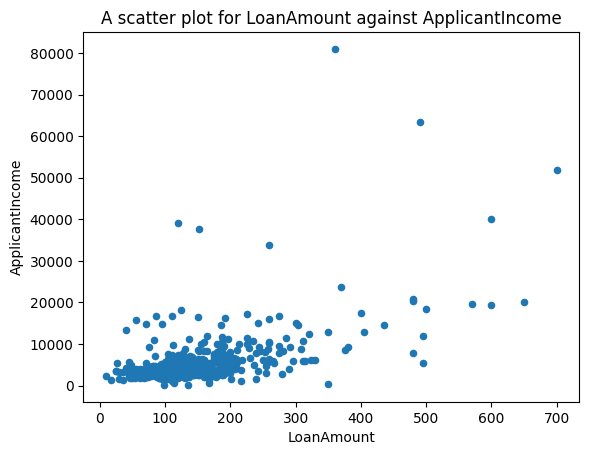

In [19]:
#Explain the central tendency of any two continuous variables.
# We use a scatter plot 

loan.plot.scatter(x = 'LoanAmount', y = 'ApplicantIncome', title = "A scatter plot for LoanAmount against ApplicantIncome")

The Applicant Income is positively correlated to the Loan Amount

5.Relationship between  Gender(categorical) and Loan_Status(categorical)

In [24]:
#Explain the relationship between the variables "Gender" and "Loan_Status."
#For categorical variables we use grouped bar plots or chisq test(x2)
#We create a variable to host the categorical variables 

loan_cat = loan[['Gender','Loan_Status']]#we us double box brackets to select multiple variables
loan_cat


,Gender,Loan_Status
0,Male,Y
1,Male,N
2,Male,Y
3,Male,Y
4,Male,Y
...,...,...
609,Female,Y
610,Male,Y
611,Male,Y
612,Male,Y


In [25]:
#Running the chsqx test
cross_tab_results = pd.crosstab(index=loan_cat['Gender'],columns=loan_cat['Loan_Status'])
print(cross_tab_results)


Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


<Axes: xlabel='Gender'>

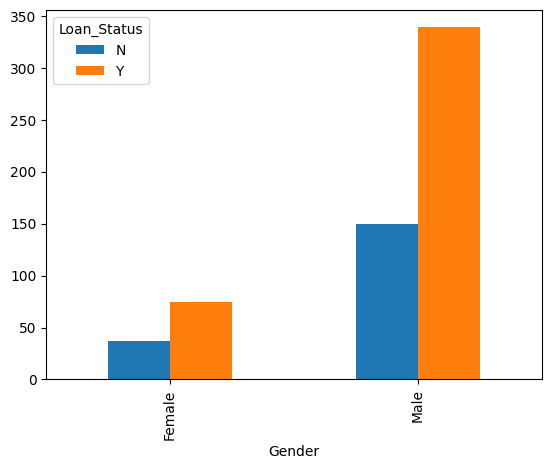

In [26]:
#we then generate a bar plot to depict the relationship
cross_tab_results.plot.bar()

In [27]:
# import the required library to generate a contigency table
from scipy.stats import chi2_contingency

In [28]:
# Perform Chi-square test
chisqresult = chi2_contingency(cross_tab_results)

In [30]:
print('The P-Value of the ChiSq Test is:', chisqresult[1])
#The psquare value is >0.5 therefore Gender and Loan_Status are not correlated

The P-Value of the ChiSq Test is: 0.7086529816451106


GROUP 2
Kawooma Elijah   M24B38/023
Justin Odeke M24B38/   B27537
Mugoya Andrew M24B23/013
Magomu Emmanuel  M24B38/013
Rockdit Minyiel M24B23/40
Anthony Ssetimba M24B23/033